In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
image = cv2.imread("C:/Users/minki/Desktop/2022CUAI_winter/image2.jpg")
image = image.resize((300,300))

In [35]:
print(image.shape) #rgb는 3채널

AttributeError: 'NoneType' object has no attribute 'shape'

In [29]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합
print(image.shape)


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [22]:
k = 1 # K를 1로 바꿈
clt = KMeans(n_clusters = k)
clt.fit(image)

KMeans(n_clusters=1)

In [23]:
for center in clt.cluster_centers_:
    print(center)

[185.95482422 180.09368164 181.04854248]


In [24]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


hist = centroid_histogram(clt)
print(hist)

[1.]


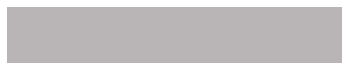

In [25]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

bar = plot_colors(hist, clt.cluster_centers_)


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

### k값을 1로 하면 이미지 색상의 평균을 확인할 수 있다.

이미지 색상의 평균값을 csv 파일에 rgb 값으로 저장해준다.